In [1]:
import pandas as pd

df = pd.read_csv("imbalanced_dataset.csv")   # 6000 per class dataset
print("Dataset loaded:", df.shape)
df.head()

Dataset loaded: (568454, 2)


,Score,Summary
0,5,Good Quality Dog Food
1,1,Not as Advertised
2,4,"""Delight"" says it all"
3,2,Cough Medicine
4,5,Great taffy


In [2]:
import pandas as pd

# Load the imbalanced_reviews dataset
df = pd.read_csv('imbalanced_dataset.csv')

print(df['Score'].value_counts())  # Check rating distribution


Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64


In [3]:
df["Summary"] = df["Summary"].astype(str).str.lower()
df.head()

,Score,Summary
0,5,good quality dog food
1,1,not as advertised
2,4,"""delight"" says it all"
3,2,cough medicine
4,5,great taffy


In [4]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)            # remove URLs
    text = re.sub(r"<.*?>", "", text)                             # remove HTML tags
    text = re.sub(r"[^\w\s]", "", text)                           # remove punctuation & special characters
    text = re.sub(r"[\U0001F600-\U0001F64F"
                  r"\U0001F300-\U0001F5FF"
                  r"\U0001F680-\U0001F6FF"
                  r"\U0001F1E0-\U0001F1FF]+", "", text)           # remove emojis
    text = re.sub(r"\s+", " ", text).strip()                      # remove extra spaces
    return text
df["Clean_Review"] = df["Summary"].apply(clean_text)
df.head()

,Score,Summary,Clean_Review
0,5,good quality dog food,good quality dog food
1,1,not as advertised,not as advertised
2,4,"""delight"" says it all",delight says it all
3,2,cough medicine,cough medicine
4,5,great taffy,great taffy


In [5]:

import nltk
import sys
import io
from contextlib import redirect_stdout

# Suppress NLTK download messages
f = io.StringIO()
with redirect_stdout(f):
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords', quiet=True)


In [6]:
from nltk.corpus import stopwords
#remove stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)
df["NoStop_Review"] = df["Clean_Review"].apply(remove_stopwords)

df.head()

,Score,Summary,Clean_Review,NoStop_Review
0,5,good quality dog food,good quality dog food,good quality dog food
1,1,not as advertised,not as advertised,advertised
2,4,"""delight"" says it all",delight says it all,delight says
3,2,cough medicine,cough medicine,cough medicine
4,5,great taffy,great taffy,great taffy


In [7]:
import nltk
nltk.download("wordnet", quiet=True)
nltk.download("omw-1.4", quiet=True)
nltk.download("punkt", quiet=True)
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(lemmatized_words)

df["Lemmatized_Review"] = df["NoStop_Review"].apply(apply_lemmatization)
df.head()

,Score,Summary,Clean_Review,NoStop_Review,Lemmatized_Review
0,5,good quality dog food,good quality dog food,good quality dog food,good quality dog food
1,1,not as advertised,not as advertised,advertised,advertised
2,4,"""delight"" says it all",delight says it all,delight says,delight say
3,2,cough medicine,cough medicine,cough medicine,cough medicine
4,5,great taffy,great taffy,great taffy,great taffy


In [8]:
# Function to count words in a review
def word_count(text):
    return len(str(text).split())

# Apply filtering: keep only reviews that contain 3 to 50 words
filtered_df = df[df['Clean_Review'].apply(lambda x: 3 <= word_count(x) <= 50)]

# Count remaining reviews
review_count = filtered_df.shape[0]

print("Number of reviews after filtering:", review_count)
df.head()


Number of reviews after filtering: 389740


,Score,Summary,Clean_Review,NoStop_Review,Lemmatized_Review
0,5,good quality dog food,good quality dog food,good quality dog food,good quality dog food
1,1,not as advertised,not as advertised,advertised,advertised
2,4,"""delight"" says it all",delight says it all,delight says,delight say
3,2,cough medicine,cough medicine,cough medicine,cough medicine
4,5,great taffy,great taffy,great taffy,great taffy


In [9]:
# Class distribution counts
class_counts = df['Score'].value_counts()

print("🔹 Class Distribution (Counts):")
print(class_counts)
print("\n🔹 Class Distribution (Percentage):")
print((class_counts / len(df) * 100).round(2))

# Automatic balance check
ratio = class_counts.max() / class_counts.min()

print("\n🔍 Balance Check:")
if ratio > 1.5:
    print("⚠ The dataset is IMBALANCED")
else:
    print("✔ The dataset is BALANCED")


🔹 Class Distribution (Counts):
Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

🔹 Class Distribution (Percentage):
Score
5    63.88
4    14.19
1     9.19
3     7.50
2     5.24
Name: count, dtype: float64

🔍 Balance Check:
⚠ The dataset is IMBALANCED


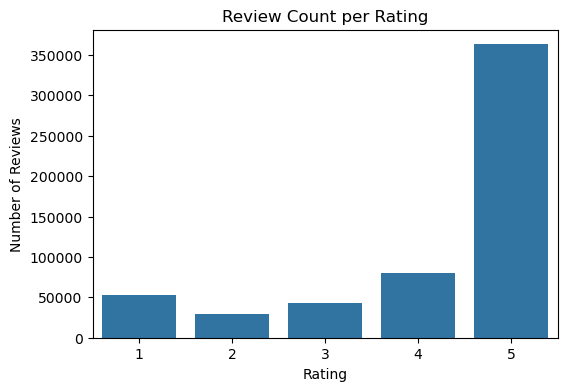

In [10]:
#review count per rating
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Score', data=df)
plt.title('Review Count per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


In [11]:
df['word_count'] = df['Clean_Review'].apply(lambda x: len(str(x).split()))


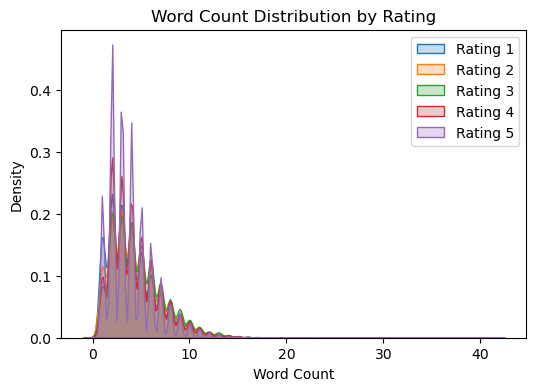

In [12]:
plt.figure(figsize=(6,4))
for rating in sorted(df['Score'].unique()):
    sns.kdeplot(df[df['Score'] == rating]['word_count'], label=f"Rating {rating}", fill=True)
plt.title("Word Count Distribution by Rating")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.legend()
plt.show()


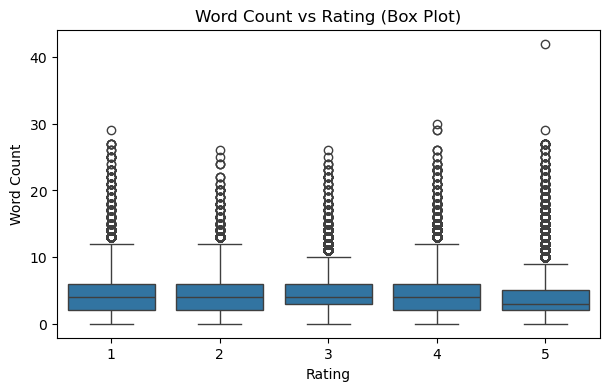

In [13]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Score', y='word_count', data=df)
plt.title("Word Count vs Rating (Box Plot)")
plt.xlabel('Rating')
plt.ylabel('Word Count')
plt.show()


In [14]:
for rating in sorted(df['Score'].unique()):
    print(f"\n⭐ Sample reviews for Rating {rating}:\n")
    samples = df[df['Score'] == rating]['Clean_Review'].sample(10)   
    for r in samples:
        print("•", r)


⭐ Sample reviews for Rating 1:

• taste terrible
• not what i expected
• warning contains soy
• celtic sea salt has impuriities
• old saf t pops
• all bottles were received open and no safety seal
• dont buy nothing like teriyaki jerky
• no good
• corn really
• i would give this zero stars if i could

⭐ Sample reviews for Rating 2:

• i just saw sugar listed as one of the ingredients
• not bad taste but bad aroma
• not enough product in sample for valid review
• good coffeelousy packaging
• astronaut jerky
• weird taste
• coffee for tea drinkers
• quite a few bad tasting ones
• nasty tea debris everywhere
• cocoa good product packing awful

⭐ Sample reviews for Rating 3:

• good but
• tasty if not very spicy
• hibiscus rosehip tea with a little blackberry and vanilla flavoring
• cats like these but packaging is ridiculous
• good ice cream topping
• drinkable flavored coffee
• it keeps you regular
• my babies dont like spinach
• great product but the subscription ships old products
• g

In [15]:
df['Score'].value_counts()


Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [3]:
#5.DATASET SHUFFLING
import pandas as pd

df_balanced= pd.read_csv("imbalanced_dataset.csv")     # or your filename

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print("Dataset shuffled successfully!")


Dataset shuffled successfully!


In [4]:
print(df_balanced.columns)


Index(['Score', 'Summary'], dtype='object')


In [5]:
#perform stratified dataset
from sklearn.model_selection import train_test_split

# Features and labels
X = df_balanced['Summary']  # preprocessed review text
y = df_balanced['Score']         # rating 1–5

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,       # 20% for testing
    random_state=42,      # for reproducibility
    shuffle=True,
    stratify=y            # maintain class balance
)

# Output sizes and class distribution
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())


Training set size: 454763
Test set size: 113691

Class distribution in training set:
Score
5    290498
4     64524
1     41814
3     34112
2     23815
Name: count, dtype: int64

Class distribution in testing set:
Score
5    72624
4    16131
1    10454
3     8528
2     5954
Name: count, dtype: int64


In [6]:
#ensure both class balance in sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))  # proportions

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))   # proportions

Training set class distribution:
Score
5    0.638790
4    0.141885
1    0.091947
3    0.075010
2    0.052368
Name: proportion, dtype: float64

Test set class distribution:
Score
5    0.638784
4    0.141885
1    0.091951
3    0.075010
2    0.052370
Name: proportion, dtype: float64


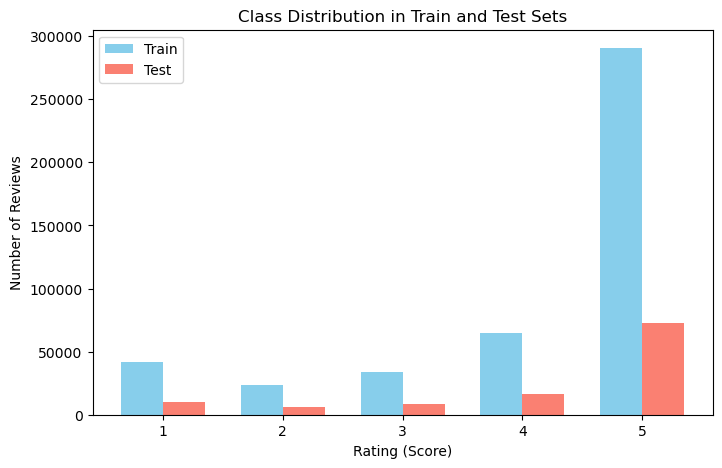

In [20]:
#quick bar plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combine data for plotting
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

df_plot = pd.DataFrame({
    'Rating': train_counts.index,
    'Train': train_counts.values,
    'Test': test_counts.values
})

# Plot
plt.figure(figsize=(8,5))
bar_width = 0.35
x = df_plot['Rating']

plt.bar(x - bar_width/2, df_plot['Train'], width=bar_width, label='Train', color='skyblue')
plt.bar(x + bar_width/2, df_plot['Test'], width=bar_width, label='Test', color='salmon')

plt.xlabel('Rating (Score)')
plt.ylabel('Number of Reviews')
plt.title('Class Distribution in Train and Test Sets')
plt.xticks(x)
plt.legend()
plt.show()


In [21]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

# ---- TRAIN SET PREPROCESSING ----
X_train = X_train.apply(clean_text)
X_train = X_train.apply(remove_stopwords)
X_train = X_train.apply(lemmatize_text)

# ---- TEST SET PREPROCESSING ----
X_test = X_test.apply(clean_text)
X_test = X_test.apply(remove_stopwords)
X_test = X_test.apply(lemmatize_text)

print("Preprocessing applied to train and test sets successfully!")
X_train.head()
X_test.head()


Preprocessing applied to train and test sets successfully!


337802                           Delish
137180                   love love love
183563    Greenies greatalbiet Xpensive
141344                       nice stuff
34426     healthy snack thats bit sweet
Name: Summary, dtype: object

In [22]:
#5:vectorization
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# ---------------------------------------------------------------------
# SECTION 1 — PREPROCESSING FUNCTIONS
# ---------------------------------------------------------------------
def clean_text(text):
    """Lowercase, remove punctuation, numbers, and extra spaces."""
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)   # you can adjust max_features if needed

# Fit only on TRAIN data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform TEST data using the same vocabulary learned from train
X_test_vec = vectorizer.transform(X_test)

print("Vectorization completed successfully!")
print("Training matrix shape:", X_train_vec.shape)
print("Testing matrix shape:", X_test_vec.shape)


Vectorization completed successfully!
Training matrix shape: (454763, 5000)
Testing matrix shape: (113691, 5000)


In [23]:
from sklearn.model_selection import train_test_split

# X = text column (features), y = rating/score column (labels)
X = df["Summary"]     # or Clean_Review / Lemma_Review if already preprocessed
y = df["Score"]

# Stratified Split — ensures balance across rating classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    shuffle=True,
    random_state=42
)

# Final output
print("Final Output for Train–Test Split:")
print("X_train size:", len(X_train))
print("X_test size:", len(X_test))
print("y_train size:", len(y_train))
print("y_test size:", len(y_test))


Final Output for Train–Test Split:
X_train size: 454763
X_test size: 113691
y_train size: 454763
y_test size: 113691


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))

scores = sorted(df['Score'].unique())
for score in scores:
    subset = df[df['Score'] == score]
    sns.histplot(subset['Summary'],
                 bins=60,
                 kde=False,
                 stat="count",
                 label=f"Score {score}",
                 alpha=0.45)

plt.title("Review Length Distribution by Rating", fontsize=14, fontweight="bold")
plt.xlabel("Length of Review (words)")
plt.ylabel("Frequency")
plt.legend(title="Score")
plt.tight_layout()
plt.show()


In [ ]:
# Display 10 sample reviews per rating (with index and formatting)

for rating in range(1, 6):
    print(f"\nRating: {rating} | Showing 10 sample reviews")
    print("=" * 40)

    # Filter reviews of selected rating
    samples = df[df['Score'] == rating]['Summary'].sample(10, random_state=42)

    # Print index and review text
    for idx, review in samples.items():
        print(f"\nReview {idx}:")
        print(review)


In [ ]:
# Display 10 sample reviews per rating (1–5)

for rating in range(1, 6):
    print(f"\n{'='*60}")
    print(f" Rating: {rating} ⭐ | 10 Sample Reviews")
    print(f"{'='*60}")
    
    samples = df[df['Score'] == rating]['Summary'].sample(10, random_state=42).reset_index(drop=True)
    
    for i, review in enumerate(samples, start=1):
        print(f"{i}. {review}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a new column with review length (word count)
df['Review_Length'] = df['Summary'].apply(lambda x: len(x.split()))

# Step 2: Plot histogram grouped by rating
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Review_Length', hue='Score', bins=50, kde=False, element='step')

plt.title("Review Length Distribution by Rating")
plt.xlabel("Length of Review (words)")
plt.ylabel("Frequency")
plt.xlim(0, 3500)    # same style as the image (adjust if needed)
plt.legend(title="Score")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# -------- LEFT PLOT : BEFORE FILTERING --------
plt.subplot(1, 2, 1)
sns.histplot(df['Review_Length'], bins=60, kde=False, color='steelblue')
plt.title("Before Filtering")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

# -------- AFTER FILTERING --------
filtered_df = df[df['Review_Length'] <= 1000]  # adjust threshold if needed

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['Review_Length'], bins=60, kde=False, color='brown')
plt.title("After Filtering")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
